In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("data/10k_Poplar_Tv_Shows.csv")

# Selecionar colunas relevantes
cols = ["popularity", "vote_average", "vote_count"]
df_sel = df[cols].dropna()

print("Total de linhas carregadas:", len(df_sel))
df_sel.head()

#padronizaçao
X = df_sel.values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("Formato dos dados padronizados:", X_std.shape)


Total de linhas carregadas: 10000
Formato dos dados padronizados: (10000, 3)


In [4]:
ks = range(2, 11)
inertias = []
sil_scores = []
db_scores = []
ch_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = km.fit_predict(X_std)

    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_std, labels))
    db_scores.append(davies_bouldin_score(X_std, labels))
    ch_scores.append(calinski_harabasz_score(X_std, labels))

print("Análise K-ideal concluída!")


Análise K-ideal concluída!


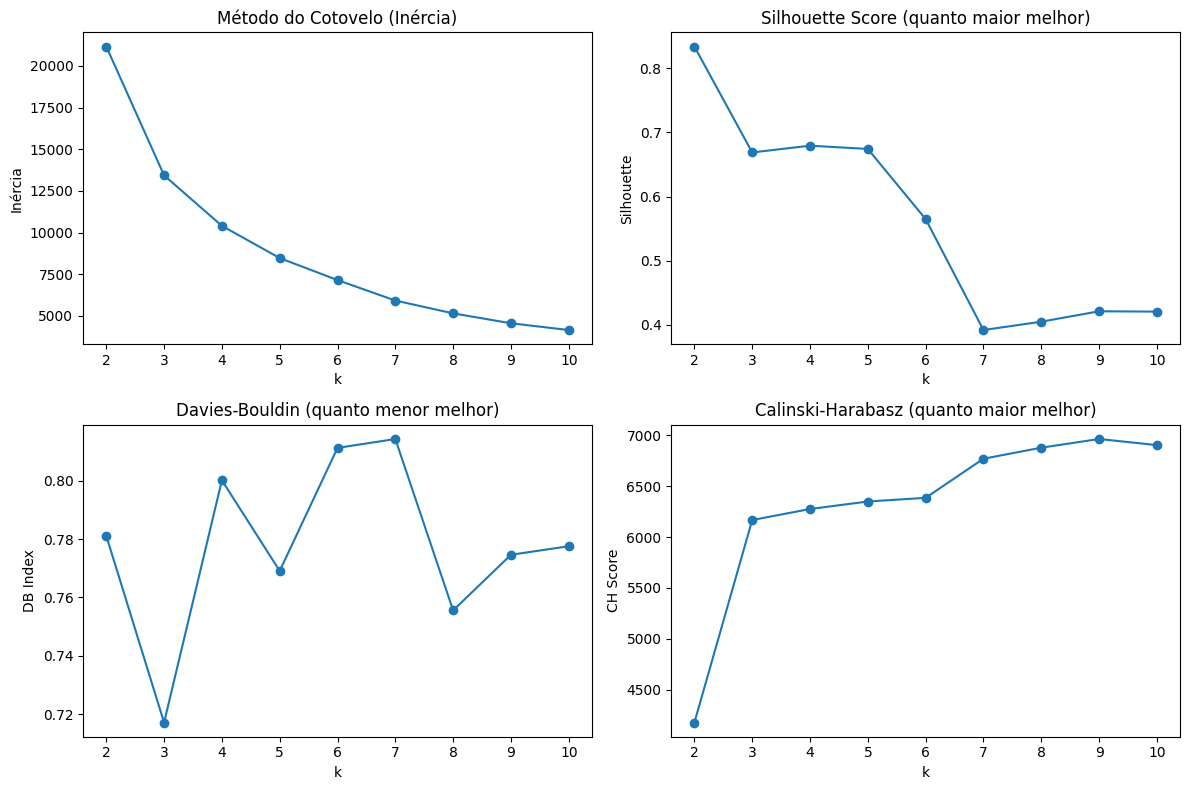

In [5]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(ks, inertias, marker='o')
plt.title("Método do Cotovelo (Inércia)")
plt.xlabel("k")
plt.ylabel("Inércia")

plt.subplot(2,2,2)
plt.plot(ks, sil_scores, marker='o')
plt.title("Silhouette Score (quanto maior melhor)")
plt.xlabel("k")
plt.ylabel("Silhouette")

plt.subplot(2,2,3)
plt.plot(ks, db_scores, marker='o')
plt.title("Davies-Bouldin (quanto menor melhor)")
plt.xlabel("k")
plt.ylabel("DB Index")

plt.subplot(2,2,4)
plt.plot(ks, ch_scores, marker='o')
plt.title("Calinski-Harabasz (quanto maior melhor)")
plt.xlabel("k")
plt.ylabel("CH Score")

plt.tight_layout()
plt.show()


K escolhido: 4
Silhouette final: 0.6794062471885387


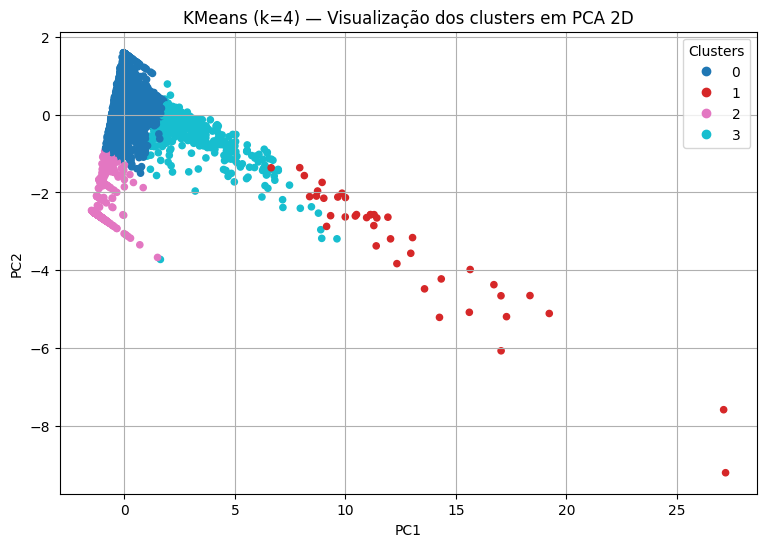

In [7]:
# Exemplo: escolha manual após análise dos gráficos
k_opt = 4  # altere conforme a melhor métrica

km_final = KMeans(n_clusters=k_opt, random_state=0, n_init=10)
labels_final = km_final.fit_predict(X_std)

print(f"K escolhido: {k_opt}")
print("Silhouette final:", silhouette_score(X_std, labels_final))

pca = PCA(n_components=2)
proj2 = pca.fit_transform(X_std)

plt.figure(figsize=(9,6))
scatter = plt.scatter(proj2[:,0], proj2[:,1], c=labels_final, cmap='tab10', s=20)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans (k={k_opt}) — Visualização dos clusters em PCA 2D")

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()
